# Runs test example

Here I present an example of a simple non-parametric test to determine whether samples in a series are random.

In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#.............................................
# PLOTTING COMMANDS 
#.............................................
import matplotlib as mpl

# set figure defaults
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 8.0/2)

Define a function to count "runs".

In [8]:
def count_runs(x):
    Npos = 0
    Nneg = 0

    sgn = np.nan
    for val in x:
        if(np.sign(val)!=sgn):
            if(np.sign(val)>0):
                Npos+=1
            else:
                Nneg+=1
            sgn = np.sign(val)

    runs = Npos + Nneg        
    return runs

Make some synthetic data to show how the runs function (above) works. Plot the synthetic data to visualize what is happening.

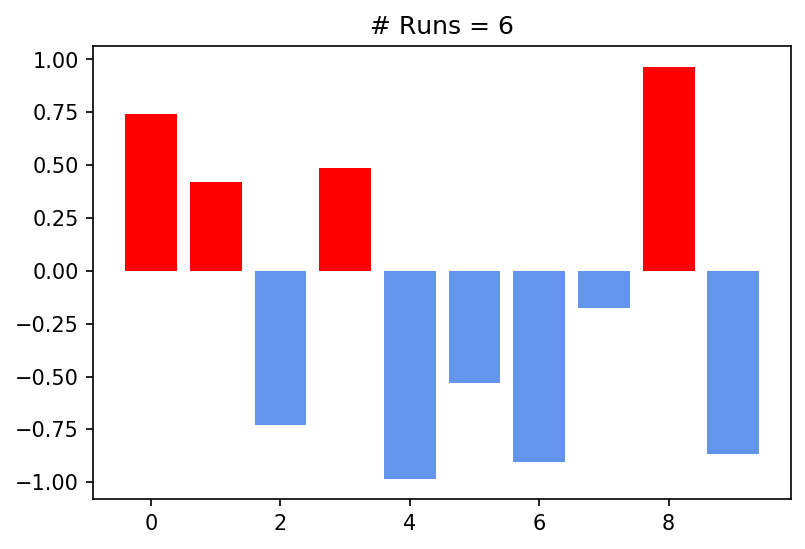

In [9]:
N = 10
x = np.random.uniform(-1.,1.,N)
for i,val in enumerate(x):
    if(val>0):
        plt.bar(i,val, color = 'red')
    else:
        plt.bar(i,val, color = 'cornflowerblue')

plt.title('# Runs = ' + str(count_runs(x)))        
plt.show()

Now create a series that is 100 in length. Loop through it 2000, mixing it every time and counting the number of runs. I have set the example up this way to ensure we always have exactly the same number of positive and negative values each loop - they are just ordered differently. (The runs test holds for a specific number of positive and negative values.)

In [ ]:
N = 100
y = np.random.uniform(-1.,1.,N)

runs = np.zeros((2000,))
for iloop in np.arange(0,len(runs)):
        x = np.random.choice(y,len(y))
        runs[iloop] = count_runs(x)
        

Determine the distribution of runs predicted by theory. Specifically, this is a normal distribution with mean of $\mu_{theory}$ and standard deviation of $\sigma_{theory}$ given below.

In [ ]:
Npos = len(np.where(x>0)[0])
Nneg = len(np.where(x<0)[0])
print('# Positive = ' + str(Npos) + ', # Negative = ' + str(Nneg))

#Theory
N = Npos + Nneg
muTheory = 1 + (2*Npos*Nneg)/N
sigmaTheory = np.sqrt((muTheory-1)*(muTheory-2)/(N-1))
print('muTheory = ' + str(muTheory) + ', sigmaTheory = ' + str(sigmaTheory))

In [ ]:
xbins = np.arange(0,600,1)
hx = np.histogram(runs,xbins)
plt.plot(xbins[:-1],hx[0]/len(runs), linewidth=2,label='monte carlo')
plt.plot(xbins[:-1],stats.norm.pdf(xbins[:-1],loc = muTheory, scale=sigmaTheory),'-',color='darkorange',linewidth=2,label='theory using Normal')
plt.xlim(0,N)
plt.xlabel('number of runs')
plt.ylabel('frequency')
plt.legend()
plt.show()